<a href="https://colab.research.google.com/github/Chiraagkv/ASL/blob/main/ASL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ASL to Text

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install kaggle
!mkdir /root/.kaggle/
!touch /root/.kaggle/kaggle.json
!echo '{"username":"tensorflowcolab","key":"key"}' > /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json
!kaggle -h
!kaggle datasets download -d grassknoted/asl-alphabet

usage: kaggle [-h] [-v] {competitions,c,datasets,d,kernels,k,config} ...

optional arguments:
  -h, --help            show this help message and exit
  -v, --version         show program's version number and exit

commands:
  {competitions,c,datasets,d,kernels,k,config}
                        Use one of:
                        competitions {list, files, download, submit, submissions, leaderboard}
                        datasets {list, files, download, create, version, init, metadata, status}
                        config {view, set, unset}
    competitions        Commands related to Kaggle competitions
    datasets            Commands related to Kaggle datasets
    kernels             Commands related to Kaggle kernels
    config              Configuration settings
100% 1.03G/1.03G [00:09<00:00, 145MB/s]



In [ ]:
print("Let's start")

Let's start


In [ ]:
from zipfile import ZipFile


In [ ]:
with ZipFile('/content/drive/MyDrive/Colab Notebooks/person_detection/data/asl-alphabet.zip', 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall()

## Get the Data

In [ ]:
alphabets = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q",
             "R", "S", "T", "U", "V", "W", "X", "Y", "Z", "del", "nothing", "space"]
letters = [f'/content/asl_alphabet_train/asl_alphabet_train/{letter}/' for letter in alphabets]

letters

['/content/asl_alphabet_train/asl_alphabet_train/A/',
 '/content/asl_alphabet_train/asl_alphabet_train/B/',
 '/content/asl_alphabet_train/asl_alphabet_train/C/',
 '/content/asl_alphabet_train/asl_alphabet_train/D/',
 '/content/asl_alphabet_train/asl_alphabet_train/E/',
 '/content/asl_alphabet_train/asl_alphabet_train/F/',
 '/content/asl_alphabet_train/asl_alphabet_train/G/',
 '/content/asl_alphabet_train/asl_alphabet_train/H/',
 '/content/asl_alphabet_train/asl_alphabet_train/I/',
 '/content/asl_alphabet_train/asl_alphabet_train/J/',
 '/content/asl_alphabet_train/asl_alphabet_train/K/',
 '/content/asl_alphabet_train/asl_alphabet_train/L/',
 '/content/asl_alphabet_train/asl_alphabet_train/M/',
 '/content/asl_alphabet_train/asl_alphabet_train/N/',
 '/content/asl_alphabet_train/asl_alphabet_train/O/',
 '/content/asl_alphabet_train/asl_alphabet_train/P/',
 '/content/asl_alphabet_train/asl_alphabet_train/Q/',
 '/content/asl_alphabet_train/asl_alphabet_train/R/',
 '/content/asl_alphabet_trai

In [ ]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(letters[0]) if isfile(join(letters[0], f))]

ids = []
for pic in onlyfiles:
  for let in alphabets:
    ids.append(pic.replace('.jpg', '')[1:])
len(ids)

87000

In [ ]:
image_paths = []
for letter in letters:
  for id in ids:
    path = letter + alphabets[letters.index(letter)] + id + '.jpg'
    image_paths.append(path)

image_paths

['/content/asl_alphabet_train/asl_alphabet_train/A/A2443.jpg',
 '/content/asl_alphabet_train/asl_alphabet_train/A/A2443.jpg',
 '/content/asl_alphabet_train/asl_alphabet_train/A/A2443.jpg',
 '/content/asl_alphabet_train/asl_alphabet_train/A/A2443.jpg',
 '/content/asl_alphabet_train/asl_alphabet_train/A/A2443.jpg',
 '/content/asl_alphabet_train/asl_alphabet_train/A/A2443.jpg',
 '/content/asl_alphabet_train/asl_alphabet_train/A/A2443.jpg',
 '/content/asl_alphabet_train/asl_alphabet_train/A/A2443.jpg',
 '/content/asl_alphabet_train/asl_alphabet_train/A/A2443.jpg',
 '/content/asl_alphabet_train/asl_alphabet_train/A/A2443.jpg',
 '/content/asl_alphabet_train/asl_alphabet_train/A/A2443.jpg',
 '/content/asl_alphabet_train/asl_alphabet_train/A/A2443.jpg',
 '/content/asl_alphabet_train/asl_alphabet_train/A/A2443.jpg',
 '/content/asl_alphabet_train/asl_alphabet_train/A/A2443.jpg',
 '/content/asl_alphabet_train/asl_alphabet_train/A/A2443.jpg',
 '/content/asl_alphabet_train/asl_alphabet_train/A/A244

In [ ]:
image_paths = list(set(image_paths))

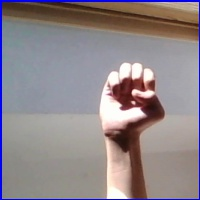

In [ ]:
from IPython.display import Image

Image(image_paths[10000])

,ids,labels
86995,1606,A
86996,1606,A
86997,1606,A
86998,1606,A
86999,1606,A


In [ ]:
idandlabels = []
for image_path in image_paths:
  first_step = image_path.replace('/content/asl_alphabet_train/asl_alphabet_train/', '')
  second_step = first_step.split('/')[1]
  third_step = second_step.replace(".jpg", '')
  idandlabels.append(third_step)

idandlabels[6]

'N1860'

In [ ]:
ids_for_df = []
labels_for_df = []
for string in idandlabels:
  id = ''
  label = ''
  for char in string:
    if char.isnumeric():
      id += char
    else:
      label += char
  ids_for_df.append(id)
  labels_for_df.append(label)

labels_for_df[0], ids_for_df[0]

('del', '996')

In [ ]:
labels_df = pd.DataFrame(data={'ids':ids_for_df, 'labels': labels_for_df})
labels_df.head()

,ids,labels
0,996,del
1,740,K
2,2198,A
3,435,L
4,2434,A


In [ ]:
labels_df.tail()

,ids,labels
86995,1999,Q
86996,1394,N
86997,2280,S
86998,898,V
86999,1785,R


In [ ]:
labels_df.sort_values(by=['labels', 'ids'], ignore_index=True, inplace=True)

yasssssssss!!!!

In [ ]:
np.array(labels_df.labels)[0] == np.array(alphabets)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False])

What next:

* convert every label to an array of bools
* Numerically encode them
* Convert the images and batch them up
* Modelling
* Improving
* Deploy